In [1]:
from IPython.core.display import HTML, Image
css_file = '../../../../msc/custom.css' 
HTML(open(css_file, 'r').read()) 

# *grmToolbox* 

Let us consider the different roles we play when estimating the generalized Roy model in our research.

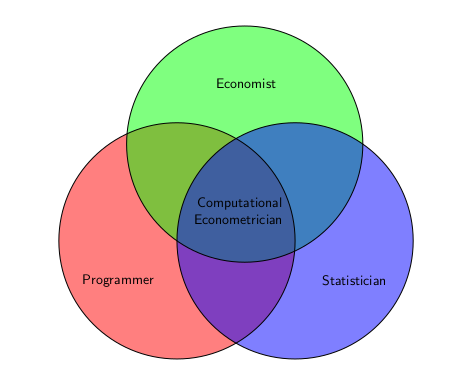

In [2]:
Image(filename='images/venn_diagram.png', width=1000)

Building a toolbox is an attempt to separate the roles as much as possible. 


Let us check out our [online](https://github.com/grmtoolbox) presence on *GitHub*. We also have prepared some [online documentation](http://grmtoolbox.github.io/) using *GitHub Pages*. Before we get started, let us import some basic libraries.

In [3]:
# Unix Pattern Extensions
import glob

# System-specific parameters and functions
import sys

# Operating System Interfaces
import os

# Scientific Computing 
import numpy as np

# High-level File Operations
import shutil

Download the recent release:

In [4]:
%%bash

# Download archived file to working directory
wget -O grmToolbox.tar.gz https://github.com/grmToolbox/grmToolbox/archive/v1.1.0.tar.gz

# Unpack file
tar -xvf grmToolbox.tar.gz

# Renaming
mv grmToolbox-1.1.0 grmToolbox

# Copy example to current working directory
cp -r grmToolbox/example .

grmToolbox-1.1.0/
grmToolbox-1.1.0/COPYING
grmToolbox-1.1.0/README.md
grmToolbox-1.1.0/__init__.py
grmToolbox-1.1.0/bin/
grmToolbox-1.1.0/bin/grmToolbox-clean
grmToolbox-1.1.0/bin/grmToolbox-estimate
grmToolbox-1.1.0/bin/grmToolbox-perturb
grmToolbox-1.1.0/bin/grmToolbox-simulate
grmToolbox-1.1.0/bin/grmToolbox-terminate
grmToolbox-1.1.0/clsCrit.py
grmToolbox-1.1.0/clsEffects.py
grmToolbox-1.1.0/clsGrm.py
grmToolbox-1.1.0/clsMax.py
grmToolbox-1.1.0/clsMeta.py
grmToolbox-1.1.0/clsModel.py
grmToolbox-1.1.0/clsParas.py
grmToolbox-1.1.0/clsRequest.py
grmToolbox-1.1.0/clsRslt.py
grmToolbox-1.1.0/dat/
grmToolbox-1.1.0/dat/testData_A.dat
grmToolbox-1.1.0/dat/testInit_A.ini
grmToolbox-1.1.0/dat/testInit_B.ini
grmToolbox-1.1.0/dat/testInit_C.ini
grmToolbox-1.1.0/dat/testInit_D.ini
grmToolbox-1.1.0/dat/testInit_E.ini
grmToolbox-1.1.0/example/
grmToolbox-1.1.0/example/dataset.dat
grmToolbox-1.1.0/example/init.ini
grmToolbox-1.1.0/grmToolbox.py
grmToolbox-1.1.0/modMaxInterface.py
grmToolbox-1.1.0/

--2015-05-17 15:58:53--  https://github.com/grmToolbox/grmToolbox/archive/v1.1.0.tar.gz
Resolving github.com (github.com)... 192.30.252.129
Connecting to github.com (github.com)|192.30.252.129|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/grmToolbox/grmToolbox/tar.gz/v1.1.0 [following]
--2015-05-17 15:58:53--  https://codeload.github.com/grmToolbox/grmToolbox/tar.gz/v1.1.0
Resolving codeload.github.com (codeload.github.com)... 192.30.252.146
Connecting to codeload.github.com (codeload.github.com)|192.30.252.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘grmToolbox.tar.gz’

     0K .......... .......... .......... .......... .......... 1,30M
    50K .......... .......... .......... .......... .......... 2,65M
   100K .......... .......... .......... .......... .......... 10,9M
   150K .......... .......... .......... .......... .......... 3,86M
   200K

Before we turn to the program’s features, we need to modify our *PATH* variable quick access to the controls. 

In [5]:
# String that prepends to PATH
str_ = 'export PATH=' + os.getcwd() + '/grmToolbox/bin:$PATH'

# Construct absolute path of $HOME/.profile
FIlE = os.environ['HOME'] + '/.profile'

# Check if path already extended
PATH_UNDEFINED = (str_ in open(FIlE).read())

# Modify $HOME/.profile
if not PATH_UNDEFINED:
    with open(FIlE, 'a') as file_:
        file_.write(str_ + '\n')

## Explore

Let us explore the capabilities of the toolbox following the [online documentation](http://grmtoolbox.github.io). For a more advanced example of a computational toolbox, check out [structToolbox](http://structtoolbox.github.io).

Again, the model and our estimation request is stated in our initialization file. Details are available [here](http://grmtoolbox.github.io/programInstructions.html).

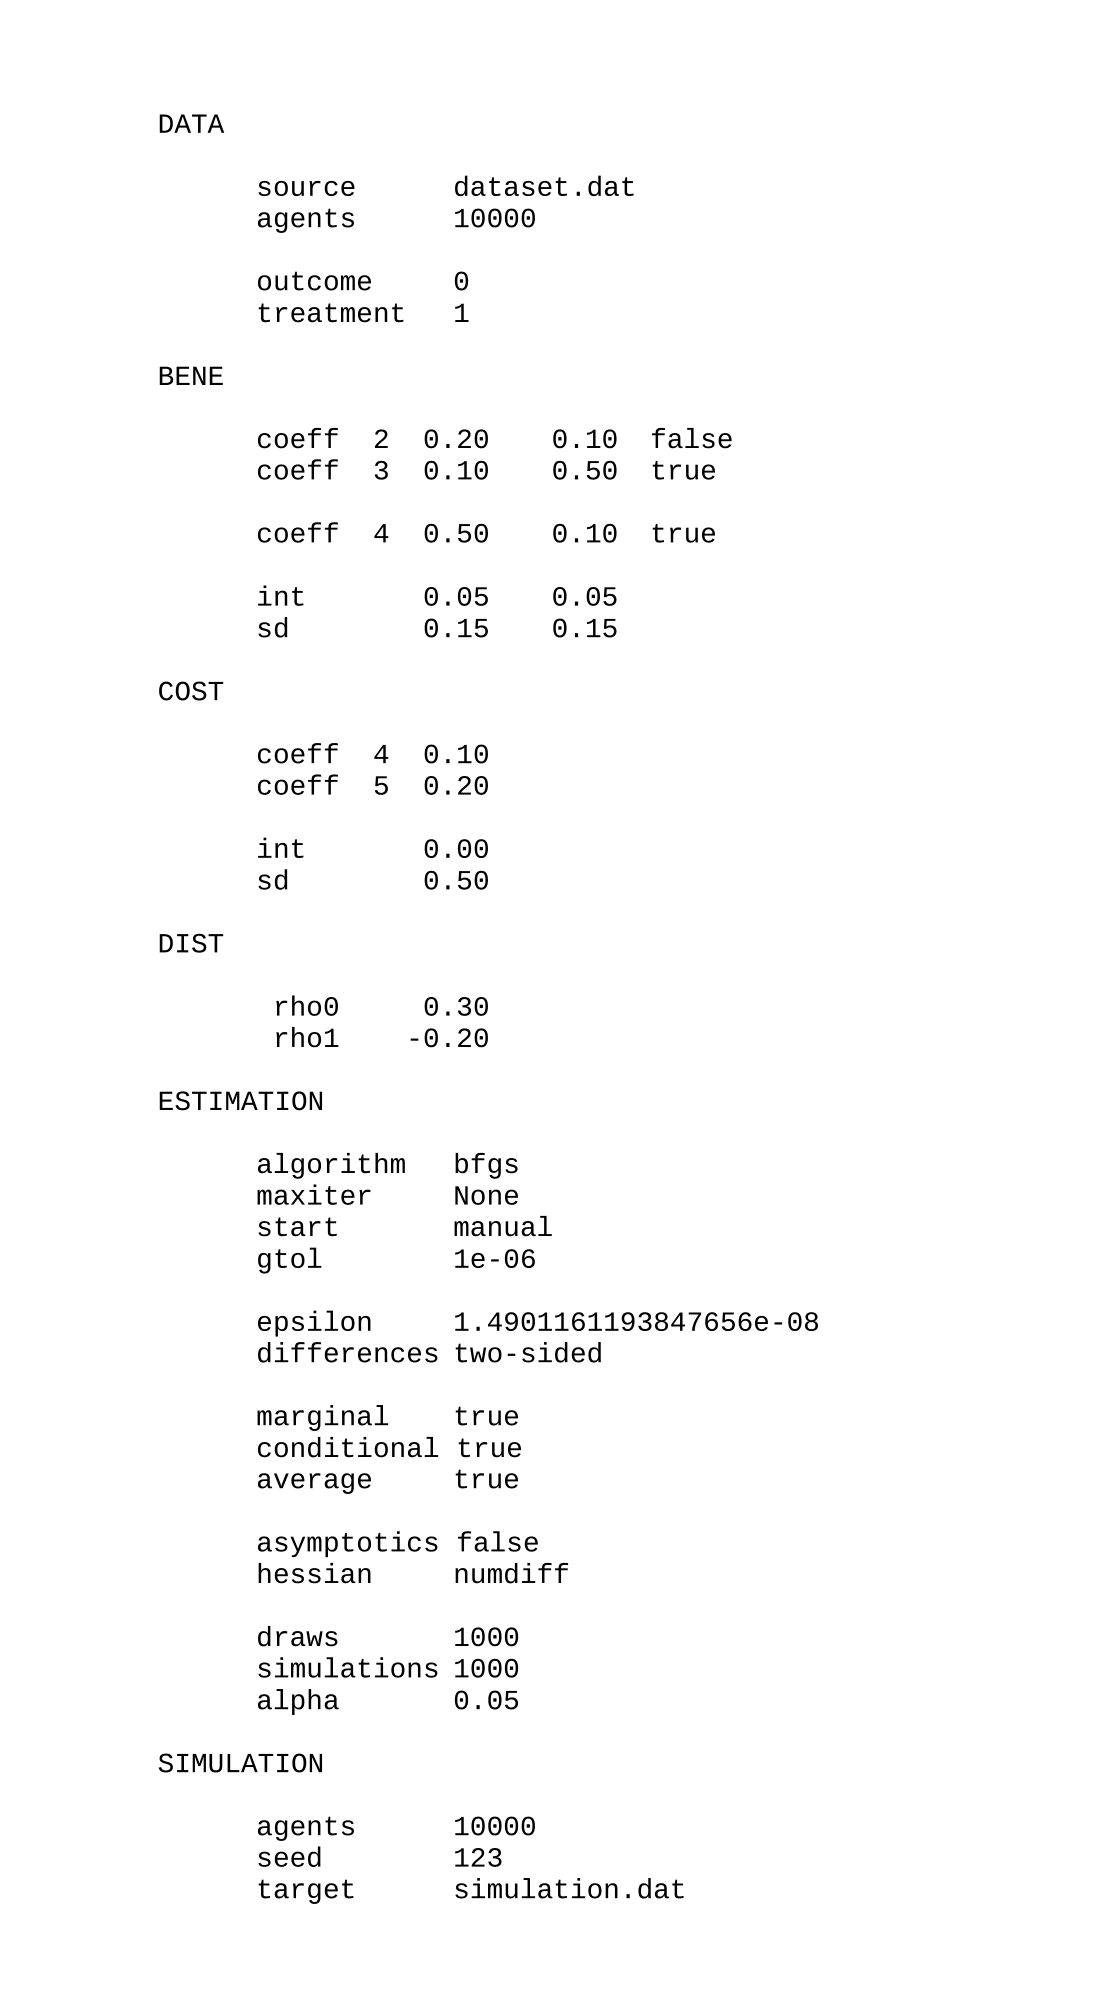

In [6]:
Image(filename='images/init.png')

**Commands**

* *grmToolbox-estimate*
        Run an estimation with the current configuration

* *grmToolbox-simulate*
        Create data simulated using the current values of the 
        structural parameters.

* *grmToolbox-terminate*
        Terminate the optimization algorithm.

* *grmToolbox-perturb*
        Perturb the current set of structural parameters.

* *grmToolbox-clean*
        Cleanup after estimation run
        
We can use the terminal to obtain additional information about these commands.

In [7]:
%%bash
grmToolbox-simulate -h

usage: grmToolbox-simulate [-h] [--init INIT] [--update]

Start simulation using the grmToolbox.

optional arguments:
  -h, --help   show this help message and exit
  --init INIT  source for model configuration (default: init.ini)
  --update     update structural parameters (default: False)


Let's now turn to the example.

In [8]:
%%bash

# Change into the working directory
cd example

# Let us check out the files
ls -l

# Let us estimate examples
grmToolbox-estimate --init init.ini

total 952
-rwxrwxr-x 1 peisenha peisenha 960000 Mai 17 15:58 dataset.dat
-rwxrwxr-x 1 peisenha peisenha    696 Mai 17 15:58 init.ini


An estimation run creates some additional new files.

In [9]:
%%bash

# Change into the working directory
cd example

# Let's have a look at the information they provide
echo ''
echo ' Documentation of Optimization Process'
echo ' -------------------------------------'
echo ''
cat grmToolbox.grm.log  # Documentation of optimization process

echo ''
echo ' Starting Values'
echo ' ---------------'
echo ''
cat startParas.grm.out  # Starting values

echo ''
echo ' Estimated Values'
echo ' ----------------'
echo ''
cat stepParas.grm.out   # Final values of the structural parameters

echo ''
echo ' Results for Treatment Effects'
echo ' -----------------------------'
echo ''
cat rslt.grm.log        # Result for the treatment effects


 Documentation of Optimization Process
 -------------------------------------


 Estimation Sample: 10000

  Start 

    Function Value: -0.020859985894


  Step 1

    Function Value: -0.0211768383228


  Step 2

    Function Value: -0.0212393526051


  Step 3

    Function Value: -0.0212685435618


  Step 4

    Function Value: -0.0213026746644


  Step 5

    Function Value: -0.0213175708169


  Step 6

    Function Value: -0.0213186874685


  Step 7

    Function Value: -0.0213205004217


  Step 8

    Function Value: -0.0213227323681


  Step 9

    Function Value: -0.0213236423209


  Step 10

    Function Value: -0.0213251845642


  Step 11

    Function Value: -0.0213274425753


  Step 12

    Function Value: -0.0213290201877


  Step 13

    Function Value: -0.0213314980887


  Step 14

    Function Value: -0.0213345877316


  Step 15

    Function Value: -0.0213371755026


  Step 16

    Function Value: -0.0213415388523


  Step 17

    Function Value: -0.0213489706086


  S

After perturbing the parameter values, we can easily restart the estimation.

In [10]:
%%bash

# Change into the working directory
cd example

# Pertrub current parameter values
grmToolbox-perturb

# Resume estimation run at stepParas.out
grmToolbox-estimate --init init.ini --resume

Assume that you just finished an estimation run on actual data. What is a good way to gain some confidence in your results? Let $M(\psi)$ denote the structural model parametrized by $\psi$, which is fit to the observed data $D^{obs}$ to produce an estimated set of parameters $\psi^{obs}$. 

The following Monte-Carlo exercise at least provides some indication:

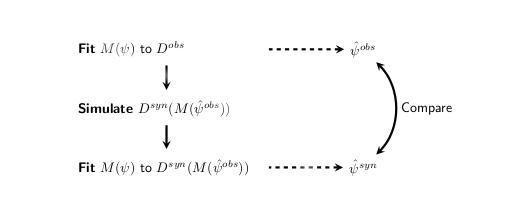

In [11]:
Image(filename='images/monte_carlo.png', width=1000)

Using the initial estimates as the parametrization for the Monte Carlo exercise ensures that important features of the data-generating process, such as unobserved variability in agent behaviors, are accounted for. In Step 2, it is crucial to follow the same estimation approach applied to the original data as closely as possible, for example, choice of starting values. This exercise showcases the performance of the estimator in a favorable setting as the model is correctly specified. If the structural parameters $\psi^{syn}$ are successfully recovered, this is encour-
aging but does not provide a definite proof of the performance in the observed data. A failure, however, offers reason for concern.

Given the design of the toolbox, implementing the idea is straightforward.

In [12]:
%%bash

# Change into the working directory
cd example

# Clean directory
grmToolbox-clean

# Estimate generalized Roy model on 
# dataset.txt
grmToolbox-estimate  

# Simulate datset with perturbed parameter values
# and store it as simulation.dat (see SIMULATION).
grmToolbox-simulate --init init.ini --update

# Perturbing parameter values
grmToolbox-perturb --init init.ini --scale 0.5 --seed 1234 --update

# Restimate generalize Roy model using SIMULATION
# as source.
grmToolbox-estimate --init init.ini --simulation

Let us compare true structural parameters of the simulated sample with the results from the second estimation run.

In [14]:
# Load true and estimated parameters
true_values = np.loadtxt('example/simulation.paras.grm.out')
est_values = np.loadtxt('example/stepParas.grm.out')
start_values = np.loadtxt('example/startParas.grm.out')

# Auxiliary objects
num_paras = len(true_values)

# Formatting
fmt = '{0:10.2f}{1:10.2f}{2:10.2f}{3:10.2f}'

# Print both parameters
print '     Start  Estimate     Truth    Difference \n'
for i in range(num_paras):
            
    start, est, true = start_values[i], est_values[i], true_values[i]

    diff = est - true
    
    print fmt.format(start, est, true, diff)


     Start  Estimate     Truth    Difference 

      0.20      0.20      0.20      0.00
      0.10      0.10      0.10      0.00
      0.50      0.50      0.50      0.00
      0.05      0.05      0.05      0.00
      0.10      0.10      0.10     -0.00
      0.50      0.50      0.50      0.00
      0.10      0.10      0.10      0.00
      0.05      0.06      0.05      0.00
      0.10      0.11      0.10      0.01
      0.00      0.01      0.00      0.00
      0.20      0.19      0.20     -0.01
     -0.20     -0.17     -0.20      0.03
      0.30      0.25      0.30     -0.05
      0.15      0.15      0.15      0.00
      0.15      0.15      0.15     -0.00
      0.50      0.48      0.50     -0.02


## Cleanup

In [15]:
# Create list of all files generated by the notebook
files  = glob.glob('grmToolbox*')

files += glob.glob('example')

# Remove files
for file_ in files:
    try:
        os.remove(file_)
    except OSError:
        shutil.rmtree(file_)